# Swiss-Prot (Experimental) Data Formatting

This file takes data regarding kinase-protein interactions from the Swiss-Prot database (accessed through the Kinase-Phos database) and converts the data regarding experimental interactions into the .gmt format. The data was retrieved from the Kinase-Phos database on Fri, Jun 16 2017. This data will be added to enhance the KEA2 database and will be suitably formatted for use by ENRICHR and X2K. The citation for the data used by this script is "Huang, H.-D., Lee, T.-Y., Tzeng, S.-W., & Horng, J.-T. (2005). KinasePhos: a web tool for identifying protein kinase-specific phosphorylation sites. Nucleic Acids Research, 33(Web Server issue), W226–W229." and can also be found on the corresponding gh.pages website.

## Import packages necessary for following program

In [162]:
%run /home/maayanlab/Desktop/Projects/KEA3/Scripts/init.ipy

## Create a dataframe from a file containing Swiss-Prot Experimental data

In [163]:
#Read in dataframe (including empty columns pd.read_table() sees)
s = pd.read_table('~/Desktop/Projects/KEA3/Swiss_phos_exp(1).tab', names = 
                  ['Substrate', 'Pos', 'kinase_type', 'sequence', '', '', '', '', ''])

s.head()

,Substrate,Pos,kinase_type,sequence,,.1,.2,.3,.4
0,1433B_SHEEP,148,Phosphoserine,FSVFYYEILNSPEAIAELDTL,NaN,NaN,NaN,NaN,NaN
1,1433Z_SHEEP,184,Phosphoserine,FSVFYYEILNSPEKACSLAKT,NaN,NaN,NaN,NaN,NaN
2,1A12_LYCES,460,Phosphoserine,QQWKKNNLRLSFSKRMYDESV,NaN,NaN,NaN,NaN,NaN
3,3BP5_RAT,321,Phosphoserine (by MAPK12 and MAPK9),VARPGSLDLPSPVSLSEFGMM,NaN,NaN,NaN,NaN,NaN
4,3BP5_RAT,391,Phosphoserine (by MAPK12),GGRSRSQSSTSLEGQALETRM,NaN,NaN,NaN,NaN,NaN


In [164]:
#Filter out empty columns and remove unnecessary 'sequence' and 'Pos' column
swiss = s[['Substrate', 'kinase_type']]

swiss.drop_duplicates(inplace = True)

#View dataframe
swiss.head()

/home/maayanlab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Substrate,kinase_type
0,1433B_SHEEP,Phosphoserine
1,1433Z_SHEEP,Phosphoserine
2,1A12_LYCES,Phosphoserine
3,3BP5_RAT,Phosphoserine (by MAPK12 and MAPK9)
4,3BP5_RAT,Phosphoserine (by MAPK12)


In [165]:
len(swiss)

1111

## Filter by organism (Human and Mouse)

In [166]:
#Create new column 'Organism'
swiss.insert(0, "Organism", "None")

#Separate species and substrate names from each other
#Store substrate name alone and organism alone in separate  column
for index, string in swiss.Substrate.iteritems():
    swiss.Organism[index] = string.split("_", 2)[1]
    swiss.Substrate[index] = string.split("_", 2)[0]

/home/maayanlab/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [167]:
# Replace common names for human and mouse with scientific names
swiss.replace('HUMAN', 'Homo sapiens', inplace = True)
swiss.replace('MOUSE', 'Mus musculus', inplace = True)

/home/maayanlab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/maayanlab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [168]:
#View dataframe
swiss.head()

,Organism,Substrate,kinase_type
0,SHEEP,1433B,Phosphoserine
1,SHEEP,1433Z,Phosphoserine
2,LYCES,1A12,Phosphoserine
3,RAT,3BP5,Phosphoserine (by MAPK12 and MAPK9)
4,RAT,3BP5,Phosphoserine (by MAPK12)


In [169]:
#Filter indices only for substrates/kinases pertaining to human and mouse data
indices = [index for index, rowData in swiss.iterrows() 
           if rowData['Organism'] in ['Homo sapiens', 
                                      'Mus musculus']]
#Create new dataframe using these indices
swiss_filter = swiss.loc[indices]

#View dataframe
swiss_filter.head()

,Organism,Substrate,kinase_type
5,Homo sapiens,41,Phosphothreonine (by CDC2)
6,Homo sapiens,41,Phosphotyrosine (by EGFR)
7,Homo sapiens,41,Phosphoserine (by CDC2)
9,Homo sapiens,A4,Phosphoserine (by CK2)
10,Homo sapiens,A4,Phosphoserine (by CK1)


## Filter 'Kinase_type' to Retrieve Kinases

In [170]:
#Insert new column, which will represent the 'kinase' for each substrate
swiss_filter.insert(0, 'kinase', 'None')

lst = []

#Split string of 'kinase_type' to retrieve only individual kinase gene symbol
for index, string in swiss_filter.kinase_type.iteritems():
    s = string
    if "(" in s:
        s = string.split("(", 2)[1]
    if " " in s:
        count = s.count(" ")
        s = s.split(" ", count)
        if 'and' in s:
            s.remove('and')
        if 'by' in s:
            s.remove('by')
        if 'activates' in s:
            s.remove('activates')
        if 'kinase' in s:
            s.remove('kinase)')
        if 'the' in s:
            s.remove('the')
        if 'regulates' in s:
            s.remove('regulates')
        if 'in' in s:
            s.remove('in')
        if 'isoform' in s:
            s.remove('isoform')
        if 'vitro' in s:
            s.remove('vitro')
        if '' in s:
            s.remove('')
        print(s)
        if len(s) > 1:
            for l in range(0, len(s)):
                lst = lst + [[s[l], index]]
        s = s[0]    
    if ')' in s:
        s = s.split(")", 1)[0]
    swiss_filter.kinase[index] = s


#View dataframe
swiss_filter.head()

['CDC2)']
['EGFR)']
['CDC2)']
['CK2)']
['CK1)']
['CDK5', 'MAPK10)']
['CDK5', 'MAPK10)']
['PKA)']
['autocatalysis)']
['FAK1)']
['MAPK)']
['PKA)']
['ROCK1)']
['PKC)']
['PKA', 'PKC)']
['PKA)']
['PKC)']
['PKA', 'PKC)']
['PKA)']
['PDPK1)']
['EGFR)']
['PKC)']
['EGFR)']
['SRC)']
['PKC)']
['SRC)']
['PKC)']
['MAPK8)']
['PKA)']
['PKA)']
['PKB/AKT1)']
['PKC)']
['PKA)']
['CaMK1)']
['MAPK14)']
['CK)']
['PKA', 'PKB)']
['PKC)']
['CDC2)']
['CDC2)']
['autocatalysis)']
['ATM)']
['autocatalysis)']
['CK2)']
['CDK2', 'CDK3)']
['INSR)']
['GSK3)']
['CDK2)']
['CDK8)']
['PKC)']
['WEE1)']
['CAK)']
['WEE1)']
['CAK)']
['ABL1)']
['PKA)']
['PKC)']
['autocatalysis)']
['autocatalysis)']
['vitro)']
['HIPK2)']
['GSK3-beta)']
['GSK3-beta)']
['CSK)']
['CDK5)']
['autocatalysis)']
['autocatalysis)']
['HIPK1)']
['CK2)']
['INSR)']
['vitro)']
['autocatalysis)']
['autocatalysis)']
['PKB/AKT1)']
['SRC)']
['PKC)']
['autocatalysis)']
['autocatalysis)']
['MAPK1)']
['MAPK1)']
['ABL)']
['EGFR)']
['autocatalysis)']
['autocatalysis)']

,kinase,Organism,Substrate,kinase_type
5,CDC2,Homo sapiens,41,Phosphothreonine (by CDC2)
6,EGFR,Homo sapiens,41,Phosphotyrosine (by EGFR)
7,CDC2,Homo sapiens,41,Phosphoserine (by CDC2)
9,CK2,Homo sapiens,A4,Phosphoserine (by CK2)
10,CK1,Homo sapiens,A4,Phosphoserine (by CK1)


In [171]:
print(lst)

[['CDK5', 11], ['MAPK10)', 11], ['CDK5', 12], ['MAPK10)', 12], ['PKA', 59], ['PKC)', 59], ['PKA', 62], ['PKC)', 62], ['PKA', 120], ['PKB)', 120], ['CDK2', 164], ['CDK3)', 164], ['PKA', 670], ['PKC)', 670], ['IKKA', 701], ['IKKE)', 701], ['CaMK2', 756], ['MAPK)', 756], ['CaMKK1', 772], ['CaMKK2)', 772], ['CHK1', 989], ['CHK2)', 989], ['PAK2', 1361], ['PAK3)', 1361], ['MAPK1', 1400], ['MAPK3)', 1400], ['PKC', 1534], ['PKA)', 1534], ['CDK1', 1586], ['MAPK)', 1586], ['CDK1', 1590], ['MAPK)', 1590], ['RPS6KA4', 1660], ['RPS6KA5)', 1660], ['PKA', 1709], ['PKG)', 1709], ['PKA', 1711], ['PKG)', 1711], ['PKA', 1732], ['PKC)', 1732]]


In [172]:
for index, sub in swiss_filter.Substrate.iteritems():
    for pair in lst:
        if pair[1] == index:
            o = swiss_filter.Organism[index]
            k = swiss_filter.kinase_type[index]
            s = pair[0]
            if ')' in s:
                s = s.split(")", 1)
                d = pd.DataFrame([[o, sub, s[0], k]] , columns = ['Organism', 'Substrate', 'kinase', 'kinase_type'])
            else:
                d = pd.DataFrame([[o, sub, s, k]] , columns = ['Organism', 'Substrate', 'kinase', 'kinase_type'])
            swiss_filter = swiss_filter.append(d)

In [173]:
swiss_filter.head(40)

,Organism,Substrate,kinase,kinase_type
5,Homo sapiens,41,CDC2,Phosphothreonine (by CDC2)
6,Homo sapiens,41,EGFR,Phosphotyrosine (by EGFR)
7,Homo sapiens,41,CDC2,Phosphoserine (by CDC2)
9,Homo sapiens,A4,CK2,Phosphoserine (by CK2)
10,Homo sapiens,A4,CK1,Phosphoserine (by CK1)
11,Homo sapiens,A4,CDK5,Phosphothreonine (by CDK5 and MAPK10)
12,Mus musculus,A4,CDK5,Phosphothreonine (by CDK5 and MAPK10)
21,Homo sapiens,ABCA1,PKA,Phosphoserine (by PKA)
23,Homo sapiens,ABL2,Phosphotyrosine,Phosphotyrosine
24,Homo sapiens,ABL2,autocatalysis,Phosphotyrosine (by autocatalysis)


In [174]:
swiss_filter.reset_index(inplace = True, drop = True)

#Drop 'kinase_type' column since it is no lnger needed
swiss_filter.drop('kinase_type', axis = 1, inplace = True)


#For rows without a specific kinase gene symbol, replace with NaN
swiss_filter.replace(['Potential', 'similarity', 'partial',
                      'Phosphotyrosine', 'Phosphoserine', 'Phosphothreonine', 'None'],
                     np.nan, inplace = True)

#Drop all NaNs from the dataframe
swiss_filter.dropna(inplace = True)

swiss_filter.drop_duplicates(inplace = True)

In [175]:
len(swiss_filter)

278

## Combine 'Kinase' and 'Organism' Column and Create new Dataframe

In [176]:
#Create new column 'kinase_organism' joining together 'kinase' and 'Organism' columns
swiss_filter['Kinase_organism'] = ['_'.join([rowData['kinase'], rowData['Organism']]) 
                                            for index, rowData in 
                                            swiss_filter.iterrows()]

#Create new dataframe 'df_sig' and drop columns no longer needed
df_sig = swiss_filter.drop('kinase', axis = 1)
df_sig.drop('Organism', axis = 1, inplace = True)

#Drop any duplicates in the dataframe
df_sig.drop_duplicates(inplace = True)
df = df_sig.drop_duplicates()

#View dataframe
df.head()

,Substrate,Kinase_organism
0,41,CDC2_Homo sapiens
1,41,EGFR_Homo sapiens
3,A4,CK2_Homo sapiens
4,A4,CK1_Homo sapiens
5,A4,CDK5_Homo sapiens


In [177]:
len(df_sig)

278

## Set Index to 'Kinase_Organism' and Aggregate Kinase Targets

In [178]:
#Set index to 'Kinase_organism'
df.set_index('Kinase_organism')

#Group kinases in dataframe 'kin'
#Aggregate data in 'kin' according to kinase groups
kin = df.groupby('Kinase_organism').agg(lambda x: tuple(x))

#Create a new column 'Swiss-Prot Exp.' as description of data
kin.insert(0, 'Description', 'Swiss-Prot Exp.')

#Visualize Data
kin.head()

,Description,Substrate
Kinase_organism,,
ABL1_Mus musculus,Swiss-Prot Exp.,"(CDK5,)"
ABL2_Homo sapiens,Swiss-Prot Exp.,"(SIVA,)"
ABL_Homo sapiens,Swiss-Prot Exp.,"(P73, PLS1, ROBO1)"
ABL_Mus musculus,Swiss-Prot Exp.,"(ENAH,)"
ATM_Homo sapiens,Swiss-Prot Exp.,"(BRCA1, RBBP8, SMC1A, TERF1)"


In [179]:
len(kin)

98

# Exploratory Data Analysis

## Calculate Number of Protein targets for each kinase
Create a new column with the number of substrates relaed to each kinase, and sort the dataframe by this column

In [180]:
# Create column representing counts of protein targets per kinase
kin['kinase_substrate_num'] = [len(lst) for kinase, lst in kin['Substrate'].iteritems()]

# Sort kinases from max to min according to number of protein targets each has
kin.sort_values(by = ['kinase_substrate_num'], ascending= False, inplace=True)

# View dataframe
kin.head()

,Description,Substrate,kinase_substrate_num
Kinase_organism,,,
autocatalysis_Homo sapiens,Swiss-Prot Exp.,"(ABL2, BRAF1, DAPK1, DAPK2, DYR1B, E2AK2, EGFR...",33
PKA_Homo sapiens,Swiss-Prot Exp.,"(ABCA1, ADDA, ADDB, ADRB2, AP2A, AQP2, AT2B1, ...",20
PKC_Homo sapiens,Swiss-Prot Exp.,"(ADDA, ADDB, ANXA1, ANXA2, AT2B1, CD44, CFTR, ...",16
CDC2_Homo sapiens,Swiss-Prot Exp.,"(41, BIRC5, EPN1, KIF11, P53, PTN1, PTTG1, RAB...",11
CK2_Homo sapiens,Swiss-Prot Exp.,"(A4, C1R, ESR1, FURIN, LA, MYCN, NRF1, PTEN, S...",10


## Create Histogram to display distribution of number of targets per kinase

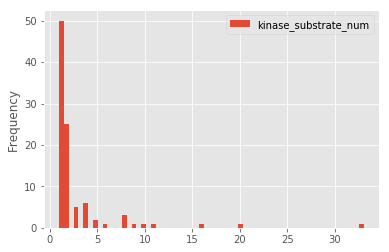

In [181]:
# Create histogram displaying the distribution of the number
#targets per kinase
kin.plot.hist(by = 'kinase_substrate_num', bins = 63)

#Show histogram
plt.show()

## Filter Dataframe by the Number of Substrates for each Kinase
If the kinase has fewer than five targets, this kinase will not be included in the final .gmt file. Instead, its information will be carried over into a .sig file.

In [182]:
df_sig.head()

,Substrate,Kinase_organism
0,41,CDC2_Homo sapiens
1,41,EGFR_Homo sapiens
3,A4,CK2_Homo sapiens
4,A4,CK1_Homo sapiens
5,A4,CDK5_Homo sapiens


In [183]:
#Create list of indexes(kinase names) for kinases with fewer than five substrates
sig_key = [index for index, rowData in kin.kinase_substrate_num.iteritems() if rowData < 5 ]

#Set indices for dataframe 'kin' of kinases with five or more substrates
indices = [index for index in kin.index if index not in sig_key]

#Create dataframe of all kinases
sig = df_sig.set_index('Kinase_organism')

#Reset index of new dataframe
sig.reset_index(inplace = True)

#Rename columns of this dataframe to match .sig format
colnames = ['Source', 'Substrate']
sig.columns = colnames

#Insert 'PubMed_ID' column as the citation of SwissProt paper, as no other citation
#was provided
#Insert column specifying interaction type as phosphorylation
sig.insert(2, 'PubMed_ID', '17517770, 15980458')

In [184]:
#Remove kinases with fewer than five substrates in 'kin'
kin = kin.loc[indices]

In [185]:
genes_term = kin.kinase_substrate_num

len(genes_term)

12

In [186]:
avg_num_terms = genes_term.mean(axis = 0)
avg_num_terms

11.583333333333334

In [187]:
stat_df = df_sig.set_index('Kinase_organism').loc[indices]

len(stat_df.Substrate.unique())

118

In [188]:
#For inclusion on website as a statistic, calculate 
#the total number of unique terms for the dataset

kinases = pd.Series([index.split('_', 2)[0] for index in kin.index])

stat_df.reset_index(inplace = True)

all_terms = pd.concat([kinases, stat_df.Substrate], axis = 0)
len(all_terms.unique())

126

## Create File of 'sig' for Later Data Aggregation

In [189]:
#Create dictionary with index numbers as keys
d = dict([(key, '') for key in sig.index])

# loop through rows with iterrows()
for index, rowData in sig.iterrows():
    line = ('\t'.join(rowData))
    d[index] = line
    
#Transfer tab-separated info into a new txt file
with open('Uncondensed_SwissProtE.txt', 'w') as openfile:
    for index in d:
        openfile.write(str(d[index]) + '\n')

## Create a .Sig File
No need to make additional changes since the original data did not include reference to a pubmed id.

In [190]:
#Insert first four columns for .sig file format (NaNs)
sig.insert(1, 'NA-1', str(np.nan))
sig.insert(2, 'NA-2', str(np.nan))
sig.insert(3, 'NA-3', str(np.nan))
sig.insert(4, 'NA-4', str(np.nan))

#Insert next four columns for .sig file format (NaNs)
sig.insert(6, 'NA-5', str(np.nan))
sig.insert(7, 'NA-6', str(np.nan))
sig.insert(8, 'NA-7', str(np.nan))
sig.insert(9, 'NA-8', str(np.nan))

#Insert column corresponding to sign (with '?' because it is unknown)
sig.insert(10, 'Sign', '?')

#Insert column specifying interaction type as phosphorylation
sig.insert(11, 'Interaction', 'Phosphorylation')

#View dataframe
sig.head()

,Source,NA-1,NA-2,NA-3,NA-4,Substrate,NA-5,NA-6,NA-7,NA-8,Sign,Interaction,PubMed_ID
0,CDC2_Homo sapiens,nan,nan,nan,nan,41,nan,nan,nan,nan,?,Phosphorylation,"17517770, 15980458"
1,EGFR_Homo sapiens,nan,nan,nan,nan,41,nan,nan,nan,nan,?,Phosphorylation,"17517770, 15980458"
2,CK2_Homo sapiens,nan,nan,nan,nan,A4,nan,nan,nan,nan,?,Phosphorylation,"17517770, 15980458"
3,CK1_Homo sapiens,nan,nan,nan,nan,A4,nan,nan,nan,nan,?,Phosphorylation,"17517770, 15980458"
4,CDK5_Homo sapiens,nan,nan,nan,nan,A4,nan,nan,nan,nan,?,Phosphorylation,"17517770, 15980458"


In [191]:
#Create dictionary 'sigd' with index numbers as keys
sigd = dict([(key, '') for key in sig.index])

# loop through rows with iterrows()
for index, rowData in sig.iterrows():
    line = ('\t'.join(rowData))
    sigd[index] = line
    
#Transfer tab-separated info into a new txt file
#Make sure to include in ReadMe corresponding column names
with open('SwissProtExpsig.txt', 'w') as openfile:
    for index in sigd:
        openfile.write(str(sigd[index]) + '\n')

# Creation of Final .GMT File

## Create dictionary of Tab-Separated Rows of the Dataframe

In [159]:
#Reset index of the dataframe
kin.reset_index(inplace = True)

#create column 'acc_merged' in which all 'acc' elements are joined by a \t symbol
kin['target_merged'] = ['\t'.join(x) for x in kin['Substrate']]

#drop the now-unneccesary column 'Substrates'
kin.drop('Substrate', axis=1, inplace = True)

#also drop the data-exploratory column 'kinase_substrate_num'
kin.drop('kinase_substrate_num', axis=1, inplace = True)

#View dataframe
kin.head()

,Kinase_organism,Description,target_merged
0,autocatalysis_Homo sapiens,Swiss-Prot Exp.,ABL2\tBRAF1\tDAPK1\tDAPK2\tDYR1B\tE2AK2\tEGFR\...
1,PKA_Homo sapiens,Swiss-Prot Exp.,ABCA1\tADDA\tADDB\tADRB2\tAP2A\tAQP2\tAT2B1\tC...
2,PKC_Homo sapiens,Swiss-Prot Exp.,ADDA\tADDB\tANXA1\tANXA2\tAT2B1\tCD44\tCFTR\tE...
3,CDC2_Homo sapiens,Swiss-Prot Exp.,41\tBIRC5\tEPN1\tKIF11\tP53\tPTN1\tPTTG1\tRAB4...
4,CK2_Homo sapiens,Swiss-Prot Exp.,A4\tC1R\tESR1\tFURIN\tLA\tMYCN\tNRF1\tPTEN\tSY...


In [160]:
#Create dictionary 'SwissProt' with index numbers as keys
SwissProt_num = dict([(key, '') for key in kin.index])

# loop through rows with iterrows()
for index, rowData in kin.iterrows():
    line = ('\t'.join((rowData)))
    SwissProt_num[index] = line

## Write Info from Dictionary into a .GMT file

In [161]:
#Transfer tab-separated info into a new txt file
with open('SwissProtexp.gmt', 'w') as openfile:
    for index in SwissProt_num:
        openfile.write(str(SwissProt_num[index]) + '\n')